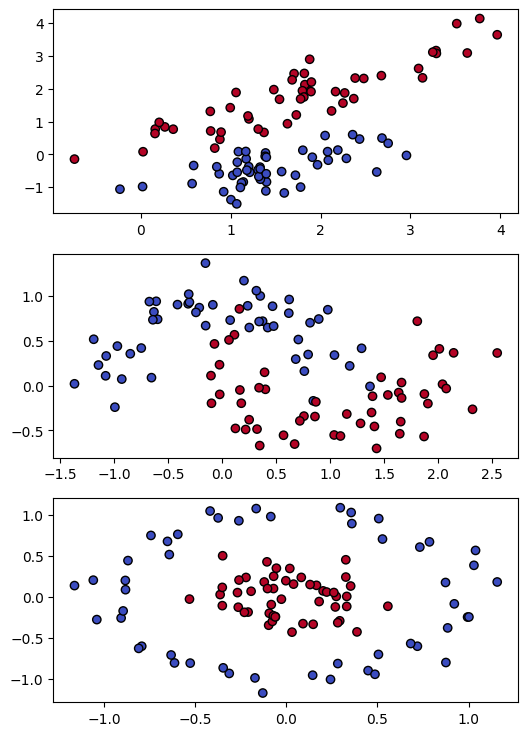

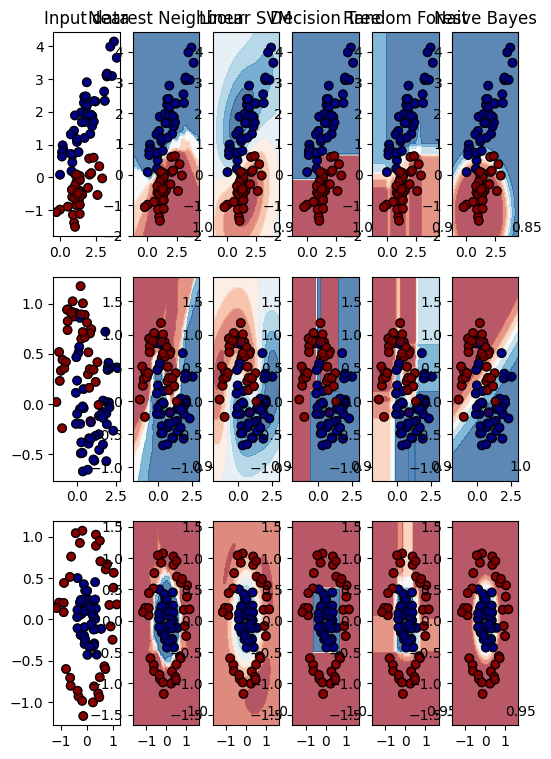

In [5]:
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.inspection import DecisionBoundaryDisplay


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np


# n_features => toplam öznitelik sayisi
# n_redundant => bilgi icermeyen öznitelik sayisi
# n_informative => bilgi iceren öznitelik sayisi
# n_clusters_per_class => her bir class icin cluster sayisi
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42)
X += 1.2 * np.random.uniform(size=X.shape) #bu gurultuyu eklemezsek lineer bir cizgi seklinde gorunuyor verilerimiz
Xy = (X, y)
# plt.scatter(X[:, 0], X[:, 1], c=y) # X'in tum satirlarinin (sample) 0. indeksini ve 1. indeksini gorsellestiriyoruz. c - color - yellow

# X, y = make_moons(noise=0.2, random_state=42)
# plt.scatter(X[:, 0], X[:, 1], c=y)

# X, y = make_circles(noise=0.1, factor=0.3, random_state=42)
# plt.scatter(X[:, 0], X[:, 1], c=y)

datasets = [Xy,
            make_moons(noise=0.2, random_state=42),
            make_circles(noise=0.1, factor=0.3, random_state=42)]

fig = plt.figure(figsize=(6,9))
i=1
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    # if ds_cnt == 0:
    #     colors = "darkred"
    # elif ds_cnt == 1:
    #     colors = "darkblue"
    # else:
    #     colors = "darkgreen"
    ax = plt.subplot(len(datasets), 1, i)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="black")
    i += 1

plt.show()

names = ["Nearest Neighbour", "Linear SVM", "Decision Tree", "Random Forest", "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB()
]

fig = plt.figure(figsize=(6,9))
i = 1
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    cm_bright = ListedColormap(["darkred", "darkblue"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i) # verilerimizi de ayni plot üzerinde gosterecegimiz icin + 1
    if ds_cnt == 0:
        ax.set_title("Input data")
    
    # plot training data
    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors="black")

    # plot test data
    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors="black", alpha=0.6)

    i += 1

    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        # StandardScaler().clf.fit()
        clf = make_pipeline(StandardScaler(), clf) # classifiers'lar birlestiriliyor
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test) # accuracy
        DecisionBoundaryDisplay.from_estimator(clf, X, cmap=plt.cm.RdBu, alpha=0.7, ax=ax, eps=0.5)

        # plot training data
        ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors="black")

        # plot test data
        ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors="black", alpha=0.6)

        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            X[:, 0].max() - 0.15,
            X[:, 1].min() - 0.35,
            str(score))
        
        i += 1